In [ ]:
pip install pyfftw scipy

In [ ]:
pip

In [ ]:
import numpy as np
import cunumeric as cu
import time
import matplotlib.pyplot as plt
import pyfftw
from scipy.fft import fft2 as scipy_fft2

def measure_time_pyfftw(data):
    start_time = time.time()
    fft_data = pyfftw.interfaces.scipy_fftpack.fft2(data)
    end_time = time.time()
    return end_time - start_time

def measure_time_scipy(data):
    start_time = time.time()
    fft_data = scipy_fft2(data)
    end_time = time.time()
    return end_time - start_time


def measure_time_cunumeric(data):
    start_time = time.time()
    fft_data = cu.fft.fft2(data)
    end_time = time.time()
    return end_time - start_time

# Range of array sizes
sizes = [64, 128, 256, 512, 1024]

# Measure time taken for each size
time_pyfftw = []
time_scipy = []
time_cunumeric= []

for size in sizes:
    data = np.random.rand(size, size)
    
    time_pyfftw.append(measure_time_pyfftw(data))
    time_scipy.append(measure_time_scipy(data))
    time_cunumeric.append(measure_time_cunumeric(data))

time_cufft = [0.000036, 0.000039, 0.000040, 0.000046, 0.000045, 0.000051, 0.000108]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_pyfftw, label='PyFFTW')
plt.plot(sizes, time_scipy, label='SciPy')
plt.plot(sizes, time_cunumeric, label='Cunumeric')
plt.plot(sizes, time_cufft, label='cufft')
plt.title('FFT2 Performance Comparison')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


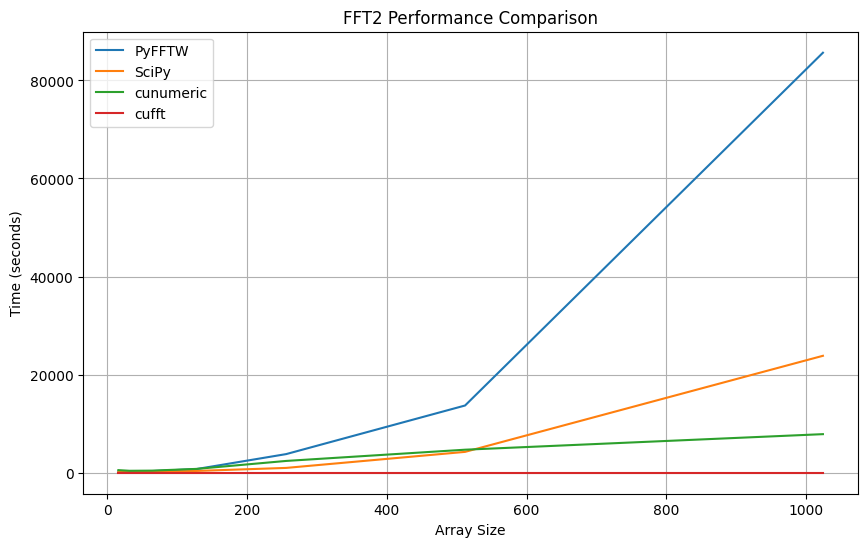

In [2]:
import numpy as np
import cunumeric as cu
# import legate.numpy as lnp
import matplotlib.pyplot as plt
import pyfftw
from scipy.fft import fft2 as scipy_fft2
import legate.timing

def measure_time_pyfftw(data):
    start_time = legate.timing.time()
    fft_data = pyfftw.interfaces.scipy_fftpack.fft2(data)
    end_time = legate.timing.time()
    return end_time - start_time

def measure_time_scipy(data):
    start_time = legate.timing.time()
    fft_data = scipy_fft2(data)
    end_time = legate.timing.time()
    return end_time - start_time

def measure_time_cunumeric(data):
    start_time = legate.timing.time()
    fft_data = cu.fft.fft2(data)
    end_time = legate.timing.time()
    return end_time - start_time

# Range of array sizes
sizes = [16, 32, 64, 128, 256, 512, 1024]

# Measure time taken for each size
time_pyfftw = []
time_scipy = []
time_cunumeric = []

for size in sizes:
    data = np.random.rand(size, size)
    
    time_pyfftw.append(measure_time_pyfftw(data))
    time_scipy.append(measure_time_scipy(data))
    time_cunumeric.append(measure_time_cunumeric(data))

time_cufft = [0.000036, 0.000039, 0.000040, 0.000046, 0.000045, 0.000051, 0.000108]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_pyfftw, label='PyFFTW')
plt.plot(sizes, time_scipy, label='SciPy')
plt.plot(sizes, time_cunumeric, label='cunumeric')
plt.plot(sizes, time_cufft, label='cufft')
plt.title('FFT2 Performance Comparison')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
